# Statistical inference via data science

Let's explore the main statistical concepts required for statistical inference.

We are three major areas of focus:

- Estimation of unknown parameters of the statistical model
- Select the best model for the data
- Do prediction with our model

There are two main approaches for statistial inference:

- Likelihood inference
- Bayesian inference

Note: the `practice_probabilites_and_descriptive_statistics.ipynb` notebook shows in practice how the Law of Large Numnbers (LLN) and Central Limit Theorem (CLT) work.

## 1. Law of large numbers (LNN) in short

**The relative frequency of an event X approaches its true probability as the number of trials increases.**

$$\overline{x} \to \mu$$  
$$n \to \infty$$
$$\overline{x} = \frac{\sum_{i=1}^{n}(x_{i})}{n}$$

- $\mu$ is the true average
- $n$ is the number of trials
- $x_{i}$ is the experiment value in trial $i$.

![Source: https://en.wikipedia.org/wiki/Law_of_large_numbers](https://i.imgur.com/G5Avq9O.png)

- (1 + 2 + 3 + 4 + 5 + 6) / 6 = 3.5 (true probability)
- Increase n. trials -> observed averages approach true probbability

## 2. Central limit theorem (CLT) in short

**The sampling distribution of the sample mean is ~normally distributed, regardless of the distribution of the underlying random sample.** Variables should be independent, identically distributed, n > 30.

- From LNN (pop. mean approximated by the mean of the sampling distribution

$$\mu_M = \mu$$

- Variance of sampl. distr. is the population variance divided by the sample size

$$\sigma^{2}_M = \frac{\sigma^{2}}{N}$$

- Std. deviation of the sampl. distr. of the mean is therefore

$$\sigma_{M}=\frac{\sigma}{\sqrt{N}}$$

- Larger sample size -> smaller std. deviation of the sampling distribution of the mean

![Source: https://en.wikipedia.org/wiki/Central_limit_theorem](https://i.imgur.com/kGryqBl.png)

- As the number of die rolls (samples) increases the sampling distribution (of the sample mean) becomes close to a normal distribution

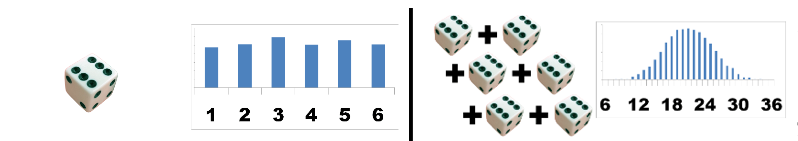

## 3. LLN & CLT in practice

### 3.1 Increasing sample size n

At what sample size n does the norma distribution make a good approximation of the actual distribution of the sample mean?

In [7]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import exponential distribution
from scipy.stats import expon

# number of samples
n = 40

# lambda value and mean expected value of an exponentially distributed random variable
lambda_val = 0.2
mean_val = 1 / lambda_val

# empty list
means = []

# random draws from exp. distr. 100000x
for i in range(100000):
    mean_sample = np.mean(expon.rvs(size=n, scale=mean_val))
    means.append(mean_sample)
    
# mean of sample means
mean_of_sample_means = np.mean(means)

In [8]:
mean_of_sample_means, mean_val

(5.002941180576378, 5.0)

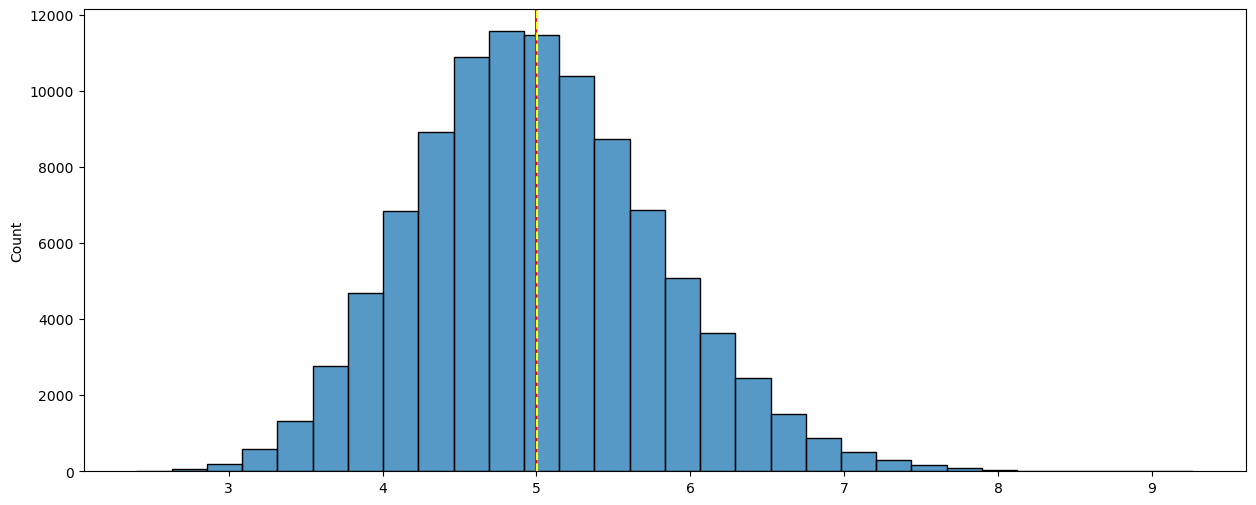

In [20]:
# plot means vs actual mean value vs mean of sample means
plt.figure(figsize=(15, 6))
ax = sns.histplot(means, bins=30)
ax.axvline(mean_val, color='red')
ax.axvline(mean_of_sample_means, color='yellow', linestyle='--')

In [21]:
# hist -> distribution of sample means
# red -> actual true mean value
# yellow -> mean of the sample means distribution

### 3.2 Calculating the sampling distribution of the mean

What is the sampling distribution of the mean for a specific sample size?

In [23]:
# import norm distr
from scipy.stats import norm

# define pop_mean, pop_std, sample_size
pop_mean = 90
pop_std = 36
sample_size = 9

# standard deviation of the sampling distribution of the mean
std_sampling_distr_mean = pop_std / np.sqrt(sample_size)

# sampling distribution
sample = norm.rvs(size=100000, loc=pop_mean, scale=std_sampling_distr_mean, random_state=1)
np.mean(sample)

90.0630363418762

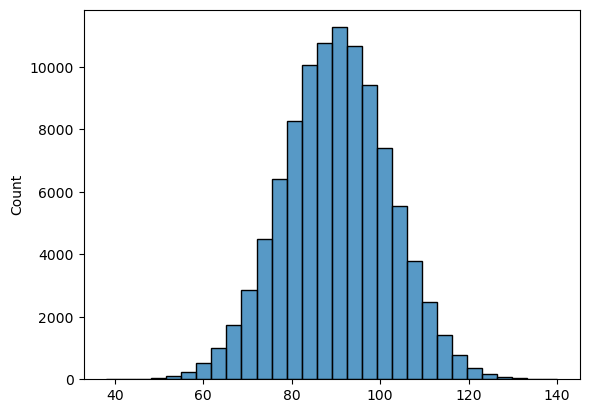

In [24]:
# plot sampling distribution
sns.histplot(sample, bins=30);

## 4. Estimators (and estimates)

- The main point of estimation is to draw information from obtained data

- Statistical inference refers to the process of drawing conclusions from the model estimation

- **An Estimator:** is a statistic (arbitrary function of a random sample), used to extract information of a parameter from the random sample.
It is expressed as a function of X.

- **An Estimate:** is the value of the evaluated estimator computed based on the data (realizations of the random sample)
It is computed based on $x_1, x_2, ..., x_n$
and is usually denoted by $\hat{\theta}$ for a parameter $\theta$

- An estimator is a function, and an estimate is a value of this function. Usually we are interested in estimates that maximize certain function

- Note: estimates can be either `point estimates` or `interval estimates`

- Note2: interval estimates have an attached `confidence interval level` used to express the precision and uncertainty associated with a particular sampling method

- Note3: interval estimates consist in a point estimate, a confidence level and a margin of error

### 4.1 Construction of estimators

- **Maximum likelihood:** finds maximum of the likelihood function to estimate parameters of probability distribution. Its goal is to find a model under which observed data is most probable

-  **Method of moments:** equates values of sample moments to population moments. Moments are the functions describing the parameter. Mean, variance, skewness, and kurtosis are all moments

-  **Bayesian methods:** introducing a frequency function for the parameter being estimated

### 4.2 What makes a good estimator